# Prática de Seaborn para visualizacao de dados

Site do Seaborn: https://seaborn.pydata.org/

Seaborn é uma biblioteca para fazer gráficos estatísticos em Python. Ele se baseia no matplotlib e se integra intimamente às estruturas de dados do pandas.

Seaborn ajuda você a explorar e compreender seus dados. Suas funções de plotagem operam em dataframes e arrays contendo conjuntos de dados inteiros e realizam internamente o mapeamento semântico e agregação estatística necessários para produzir gráficos informativos. Sua API declarativa orientada a conjuntos de dados permite que você se concentre no significado dos diferentes elementos de seus gráficos, em vez de nos detalhes de como desenhá-los.

In [2]:
# importar as bibliotecas necessárias

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importar as bases de dados que iremos usar nesse tutorial

titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [7]:
# Checar primeiras linhas dos arquivos
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Graficos Relacionais:
Estes tipos de gráficos sao utilizados para analisar a relacao entre as informacoes das bases de dados,

- Gráfico de dispersão - Scatter Plot
- Gráficos de linha - Line Plots

## Gráfico de dispersao - Scatter Plot

Esse tipo de gráfico é muito bom para visualizar as relacoes entre duas variáveis numéricas.
<br>
sns.scatterplot(data, x, y, hue, style, palette, size, sizes, legend, markers...) ou também sns.relplot()

<AxesSubplot: xlabel='age', ylabel='fare'>

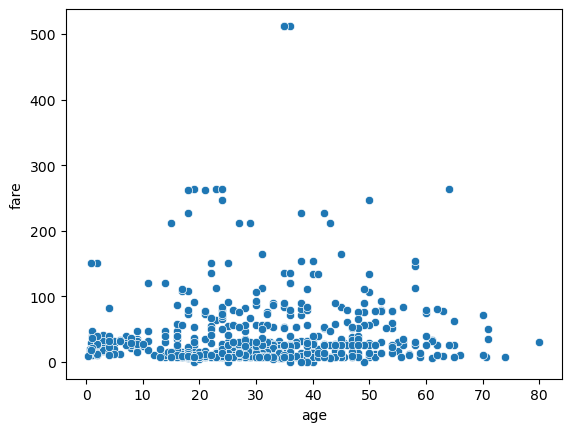

In [14]:
# Plotar um gráfico para ver o quanto as pessoas estao pagando de acordo com a idade.

sns.scatterplot(data=titanic, x="age", y="fare")

<AxesSubplot: xlabel='age', ylabel='fare'>

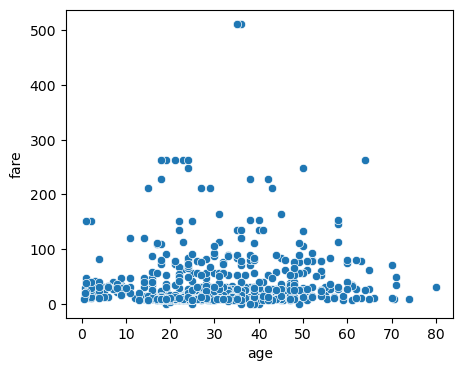

In [15]:
# Mudar o tamanho do grafico

# Comando para alterar o tamanho do grafico
plt.figure(figsize=(5,4))

sns.scatterplot(data=titanic, x="age", y="fare")

<AxesSubplot: xlabel='age', ylabel='fare'>

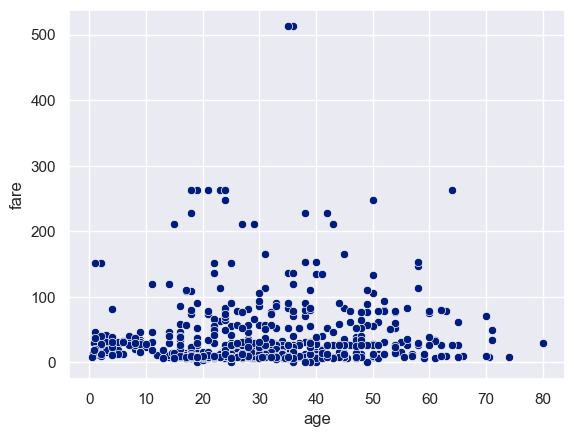

In [41]:
# Escolhendo o estilo do gráfico (darkgrid, whitegrid, dark, white e ticks) 

sns.set_theme(style='darkgrid', context='notebook', palette='dark')

sns.scatterplot(data=titanic, x="age", y="fare")

<AxesSubplot: xlabel='age', ylabel='fare'>

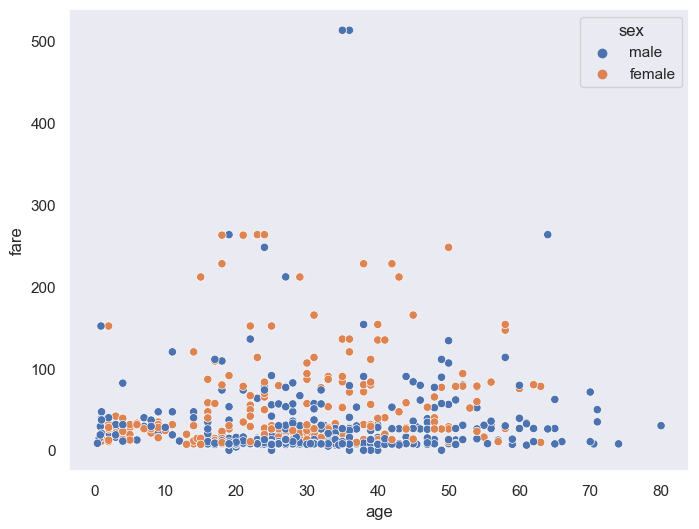

In [29]:
# Nós podemos usar o parametro 'hue' para ver mais uma variável
# Plotar um gráfico para checar o quanto as pessoas estavam pagando de acordo com a sua idade e genero.

plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

<AxesSubplot: xlabel='age', ylabel='fare'>

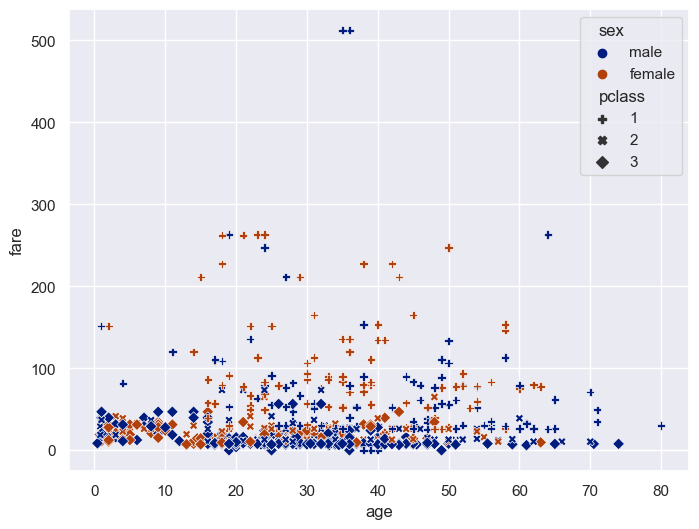

In [52]:
# Podemos mudar os marcadores de um gráfico de acordo com um parametro.
# Neste exemplo iremos alterar o estilo do marcador de acordo com a classe da passagem
# Vamos plotar um gráfico para entender quanto as pessoas estavam pagando de acordo com a sua idade e com a classe escolhida.

plt.figure(figsize=(8,6))

marcador = {1:'P', 2:'X', 3:'D'} # P, X, e D sao tipos de marcadores
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=marcador)

## Gráficos de Linha - Line plots

Gráficos de linha sao ótimos para analizar as mudancas em uma variável em respeito a outro, como por exemplo, o tempo, entender como uma variável se comporta em relacao ao tempo.

<br>
Para criar gráficos de linha no Seaborn, nós iremos utilizar sns.relplot(), com o parametro 'kind' como 'line'.
Por exemplo, nós podemos criar um grafico de dispersao mudando o tipo no sns.relplot() para 'scatter'.

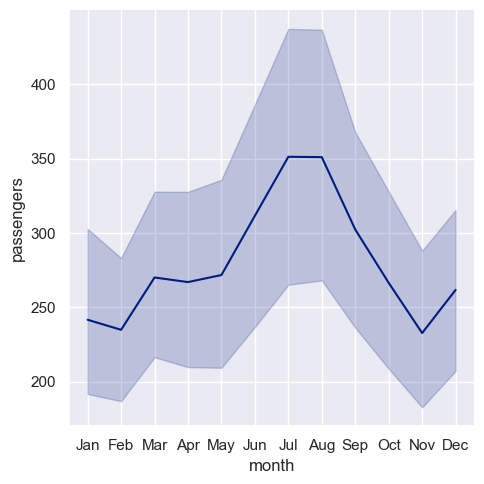

In [53]:
# Plotar gráfico de linha para checar a quantidade de passageiros voaram com o tempo.

sns.relplot(data=flights, x='month', y='passengers', kind='line')

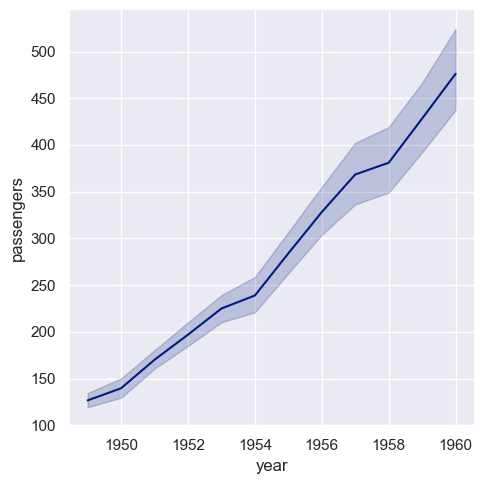

In [11]:
# Plotar um gráfico para checar o quanto foi a evolucao da quantidade de passageiros que voaram desde 1940.

sns.relplot(data=flights, x='year', y='passengers', kind='line')

### Essa cor azul clara no fundo da linha se chama 'intervalo de confianca' (confidence interval)'. 
<br>
Esse fundo é importante quando estamos plotando um gráfico de um modelo machine learning com as nossas previsoes, isso quer dizer que o resultado estará entre esse espaco.

Nós podemos remove-lo usando "errorbar=None"

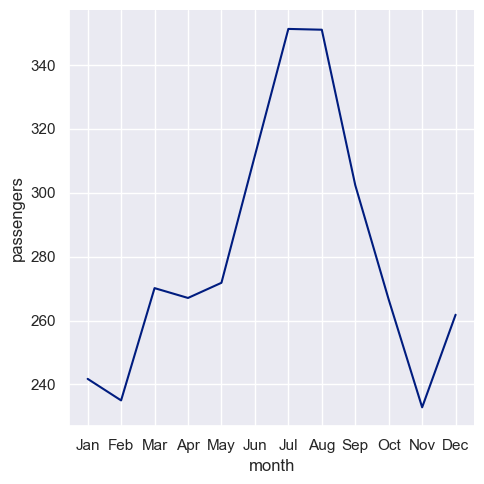

In [12]:
# Vamos plotar o mesmo gráfico de passageiros por mes, mas sem o intervalo de confianca.

sns.relplot(data=flights, x='month', y='passengers', errorbar=None, kind='line')

In [13]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


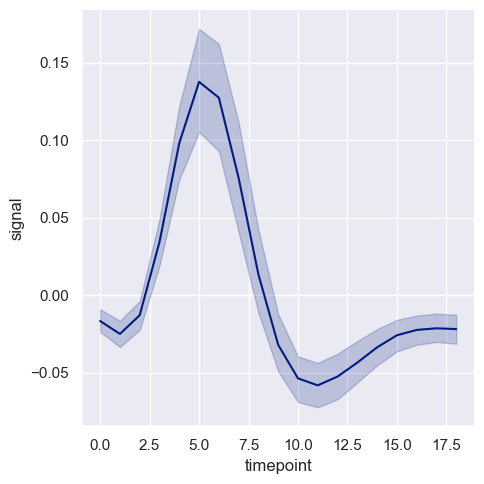

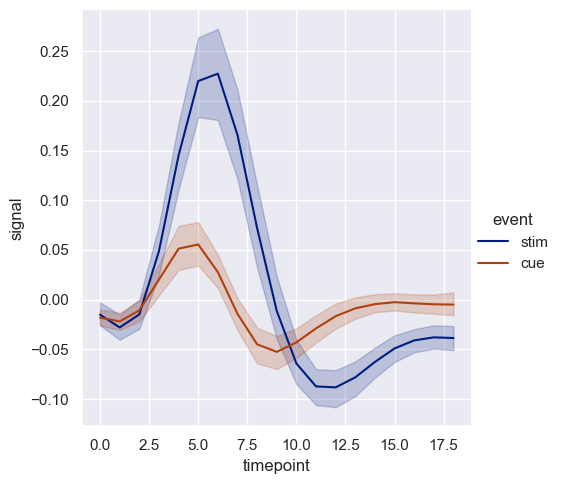

In [14]:
# Nós podemos adicionar multiplas linhas no nosso gráfico.
# Checar base fmri

# Plotar o gráfico contendo o sinal no y e timepoint no x
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', )

# Plotar o gráfico adicionando a categoria 'evento'
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line')

### É possível também adicionar mais de um gráfico de acordo com um terceiro parametro adicionando 'col'

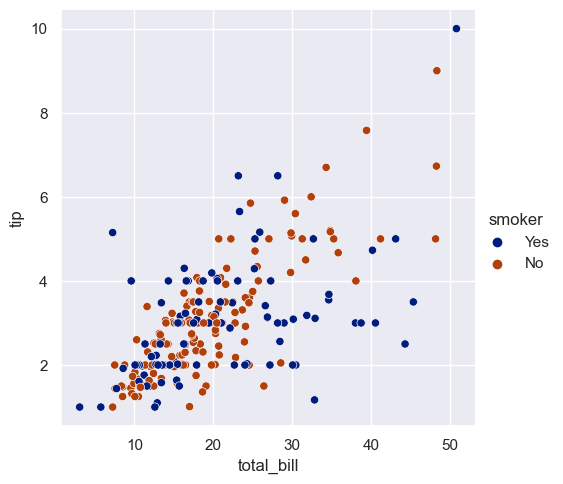

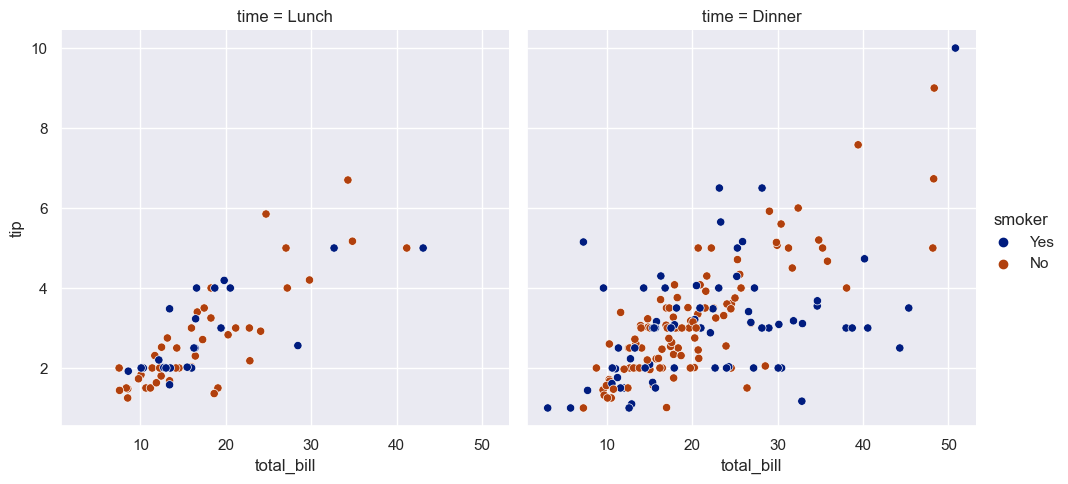

In [15]:
# Plotar um gráfico par analisar as gorjetas de acordo com o valor total da conta e se a pessoas era fumante ou nao  

sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')

# Agora plotar a mesma informacao, porem de acordo com o horário da refeicao

sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

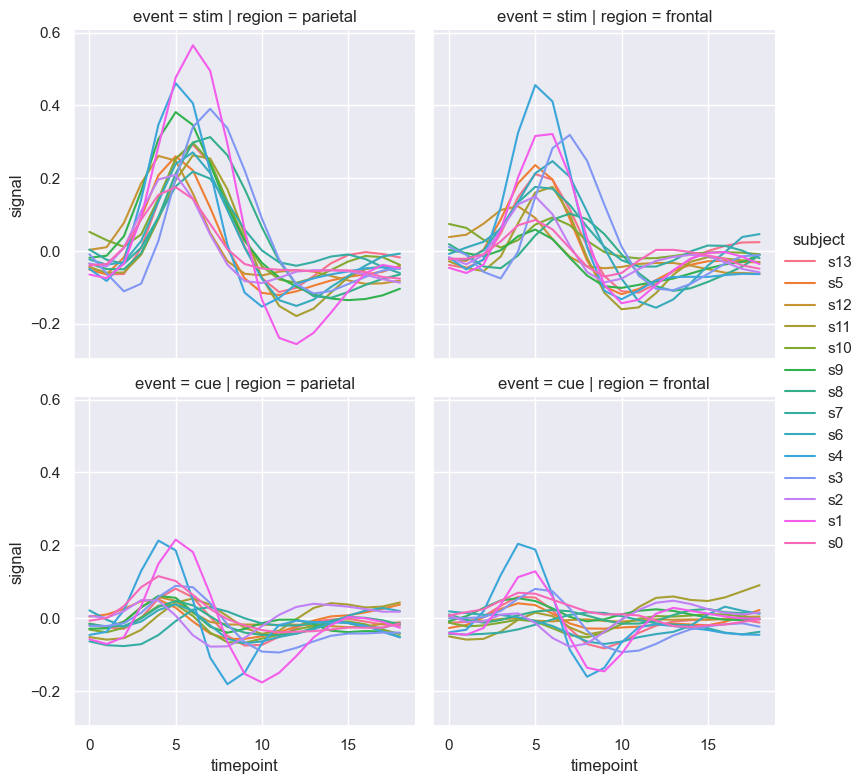

In [56]:
sns.relplot(x='timepoint', y='signal', hue='subject', col='region', row='event', height=4,
           kind='line', estimator=None, data=fmri)

### Este tipo de gráfico é importante para entender as várias relacoes que podemos ter usando diferentes variáveis e analisar como elas variam de acordo com cada cenário.

------------------

## Gráficos de Distribuicao - Distribution Plots

Esses tipos de gráficos são usados para mostrar como as informações estão espalhadas. Quando entendemos como os dados estão organizados, podemos descobrir a faixa de valores que eles abrangem, qual é o valor que costuma ser mais comum e se eles estão mais inclinados para um lado. Também é possível identificar valores que são diferentes dos outros, chamados de "valores discrepantes

Funcoes dos Gráficos de Distribuicao:

1. **displot()**: Mostra como seus números estão espalhados, como uma montanha de valores.
2. **jointplot()**: Combina duas informações diferentes em um gráfico para ver se estão conectadas.
3. **pairplot()**: Compara muitas informações diferentes entre si em vários gráficos.
4. **rugplot()**: Coloca marcas onde os números estão em um tapete para mostrar concentrações.
5. **kdeplot()**: Cria uma curva suave que dá uma ideia de como seus números estão organizados.


### Plotando histogrames com distplot() e histplot()

Histograma é um gráfico de barras cujo eixo x é uma variável ou recurso e o eixo y é a contagem de valores dessa variável específica. Por padrão, displot() cria um o histograma.

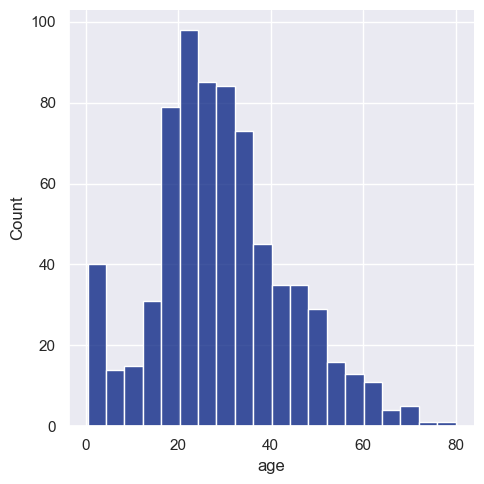

In [57]:
# Plotar histograma para ver a distribuicao de idade no titanic

sns.displot(titanic['age'])

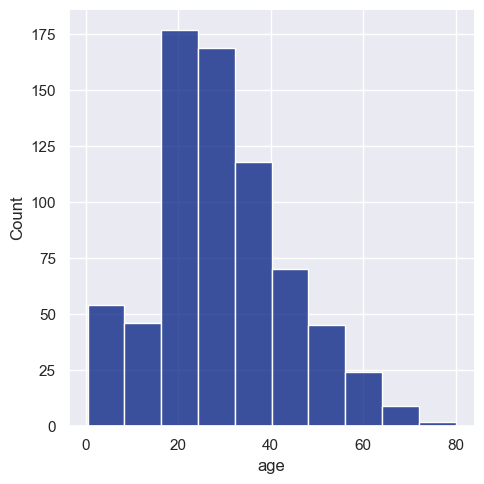

In [18]:
# Criar o mesmo grafico, porem diminuir o numero de barras para 10 (com linha e sem: kde=True e False)

sns.displot(titanic['age'], kde=False, bins=10) 

### O histplot() tambem pode ser usado para exibir dados categóricos.

Dados categóricos são como etiquetas que classificam as coisas em grupos.<br> 
É como dividir as coisas em diferentes categorias, como cores, tipos de animais ou sabores de sorvete.<br> 
Esses dados não têm números ou valores, mas são usados para dizer qual grupo algo pertence. Por exemplo, se você está listando as cores favoritas das pessoas, os dados categóricos seriam os nomes das cores (vermelho, azul, verde) em vez de números.<br> São como rótulos que ajudam a organizar e entender diferentes grupos de coisas.

<AxesSubplot: xlabel='day', ylabel='Count'>

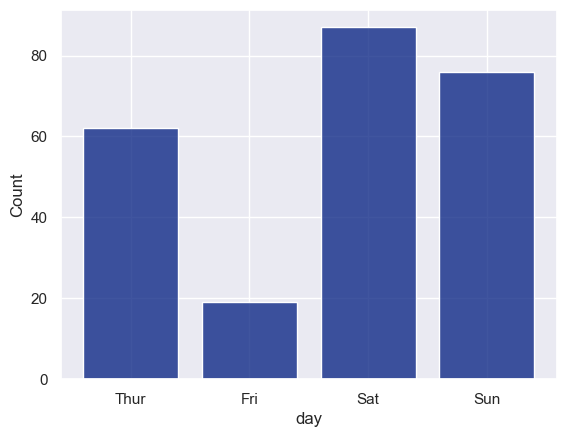

In [19]:
# Plotar um gráfico de distribuicao de acordo com o dia da semana 

sns.histplot(tips, x='day', shrink=.8)

### Assim como os gráficos relacionais, podemos inserir mais parametros para analisar melhor a distribuicao

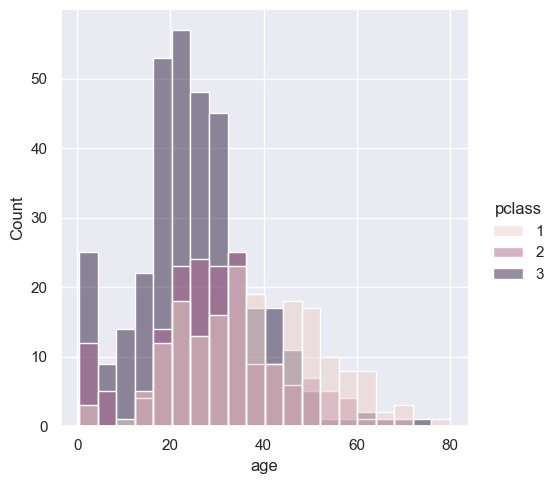

In [58]:
# Plotar um gráfico onde vemos a distribuicao da idade dos passageiros do titanic, de acordo com sua classe.

sns.displot(titanic, x='age', hue='pclass')

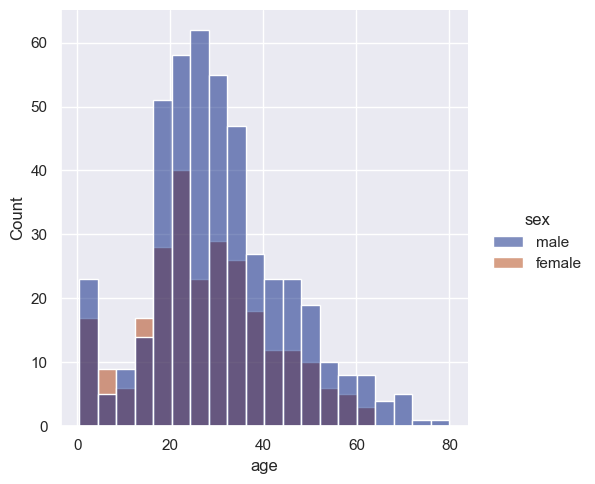

In [59]:
# Plotar um gráfico onde vemos a distribuicao da idade dos passageiros do titanic, de acordo com seu genero.

sns.displot(titanic, x='age', hue='sex')

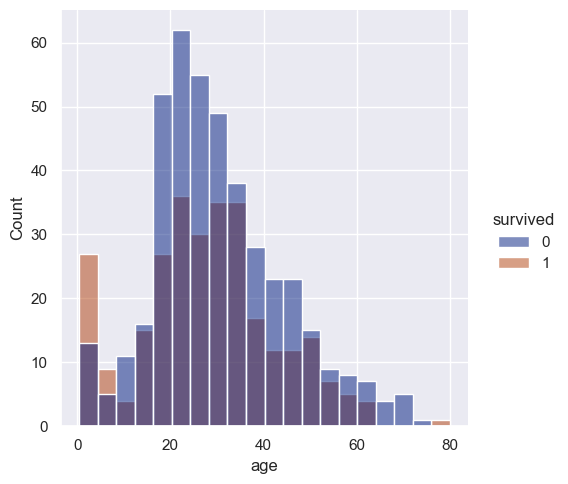

In [22]:
# Plotar um gráfico onde vemos a distribuicao da idade dos passageiros do titanic, de acordo a se sobreviveram ou nao.

sns.displot(titanic, x='age', hue='survived')

## Plotando Dados Bivariados com jointplot()

Usamos jointplot() para plotar duas variáveis com gráficos bivariados e univariados. 

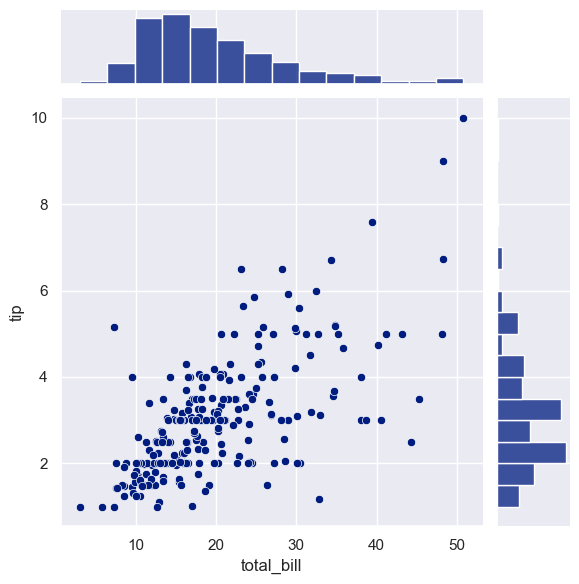

In [23]:
# Plotar um gráfico bivariado para checar a relacao do valor total da conta com o valor da gorjeta

sns.jointplot(data=tips, x='total_bill', y='tip')

## Esses gráficos são bons para entender a relação entre duas variáveis, exibindo sua distribuição e também um gráfico de dispersão

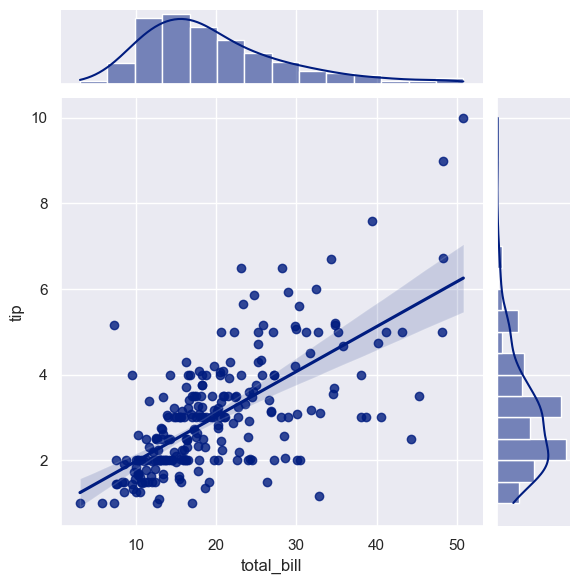

In [24]:
# Plotar gráfico bivariado com a linha de regressao.

sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

## Plotando muitas distribuições com pairplot()

pairplot() visualiza todas as distribuições possíveis de variáveis em conjuntos de dados. Esse é um gráfico muito legal, pois você pode ver imediatamente as relações entre os recursos.


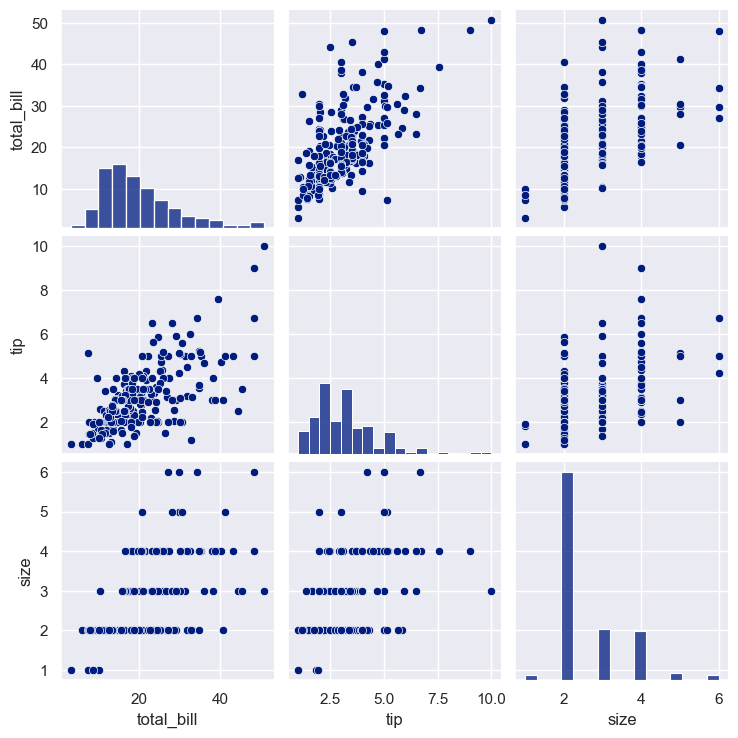

In [25]:
sns.pairplot(tips)

## Gráfico do Estimador de Densidade de Kernel (KDE) com kdeplot() e displot()

Podemos visualizar a probabilidade de densidade de uma variável. Ao contrário do histograma, que mostra as contagens, o gráfico KDE suaviza a visualização com um "kernel" gaussiano.


É como se estivéssemos olhando para a forma como as coisas se espalham, mas de maneira suave e arredondada em vez de ver números exatos. Isso nos ajuda a ver onde os valores são mais prováveis e como eles se agrupam.

<AxesSubplot: xlabel='tip', ylabel='Density'>

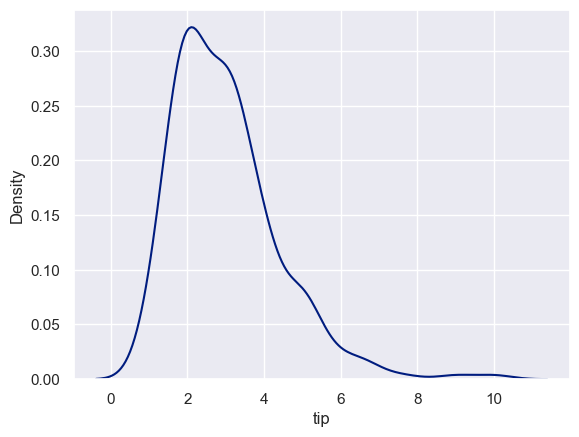

In [26]:
# Plotar um grafico KDE para checar as gorjetas

sns.kdeplot(data=tips, x='tip')

<AxesSubplot: xlabel='tip', ylabel='Density'>

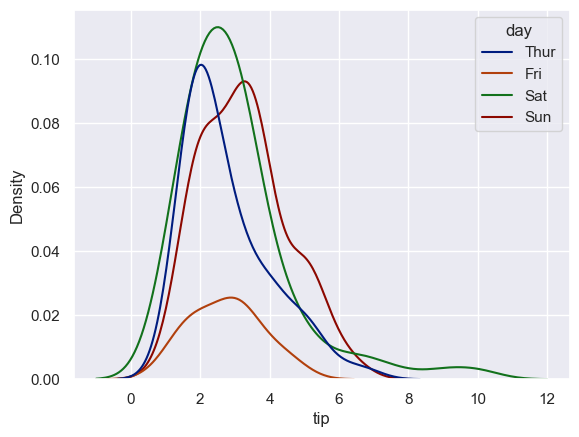

In [27]:
# Plotar um grafico KDE para checar as gorjetas por dia 

sns.kdeplot(data=tips, x='tip', hue='day')

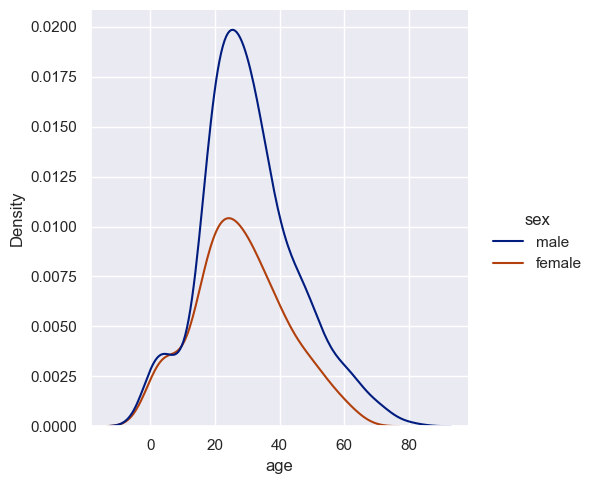

In [28]:
# Plotar um grafico KDE para checar a idade das pessoas baseada no sexo

sns.displot(titanic, x='age', kind='kde', hue='sex')

<AxesSubplot: xlabel='tip', ylabel='Density'>

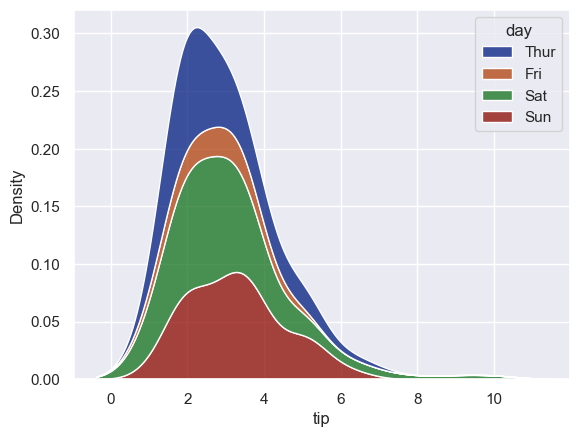

In [29]:
# Existe uma maneira de ao inves de plotar linhas, plotar os dados empilhados

sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

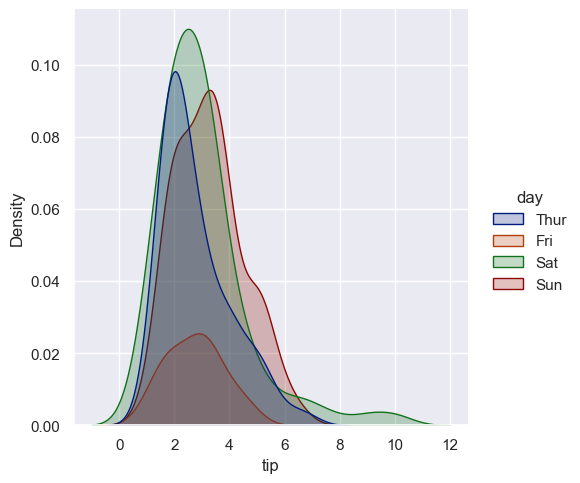

In [30]:
# E também plotar as linhas e preenchelas com um fundo claro

sns.displot(data=tips, x='tip', hue='day', kind='kde', fill=True)

## Gráficos Categóricos

Os gráficos categóricos são usados para visualizar dados em categorias.

No Seaborn, existem várias funções de gráficos que veremos:

Gráficos de estimativas categóricas

- **barplot()**: Mostra barras que representam a média de uma categoria.
- **countplot()**: Conta quantas vezes cada categoria aparece.
- **pointplot()**: Mostra pontos para comparar diferentes categorias.

Gráficos de distribuição categórica

- **boxplot()**: Mostra como os valores estão espalhados em uma categoria.
- **boxenplot()**: É como o boxplot, mas mostra mais detalhes.
- **violinplot()**: Mostra a distribuição dos valores de uma categoria.

Gráficos de dispersão categórica

- **stripplot()**: Mostra pontos para cada valor, empilhados em categorias.
- **swarmplot()**: Mostra pontos de forma mais organizada que o stripplot.

Assim como vimos nos gráficos de distribuição, o Seaborn também oferece uma função de alto nível chamada catplot() para plotar todos esses tipos acima. Você só precisa passar o parâmetro "kind". Na ordem em que estão listados acima, aqui estão os valores do parâmetro "kind": bar, count, point, box, boxen, violin, strip, swarm.

<AxesSubplot: xlabel='sex', ylabel='survived'>

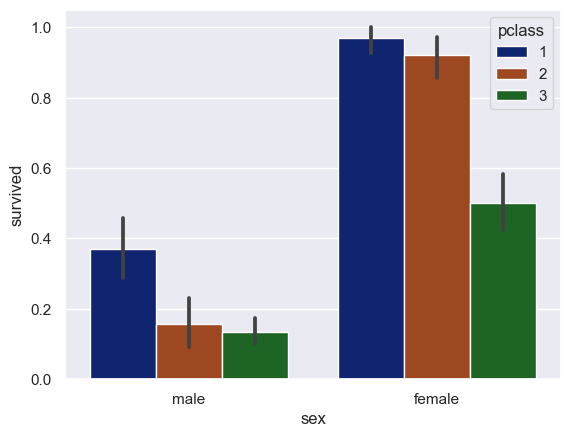

In [39]:
# Ao inves de escrevermos sns.tipografico, podemos usar sns.catplot e no argumento 'kind' passar o tipo do grafico
# Plotar um gráfico de barras para a base titanic, onde o eixo x é o genero e o y é sobreviveram ou nao, e divida por classe.

sns.barplot(data=titanic, x='sex', y='survived', hue='pclass')

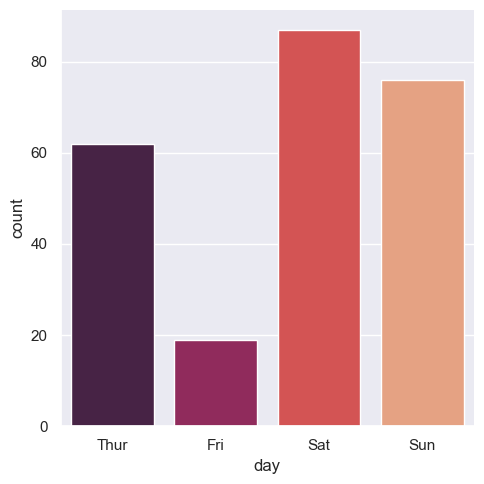

In [32]:
# Countplot
sns.countplot(data=tips, x='day', kind='count', palette='rocket')

## Gráficos de distribuição categórica

gráfico de caixa (boxplot) e gráfico de caixa mais detalhado (boxenplot), gráfico de violino (violinplot)

Tanto os gráficos de caixa, de caixa mais detalhado quanto os gráficos de violino são usados para mostrar como os dados se espalham em diferentes categorias.

"Um boxplot mostra como os dados numéricos estão distribuídos de uma forma que ajuda a comparar entre diferentes variáveis ou níveis de uma característica categórica. A caixa mostra os quartis do conjunto de dados, enquanto as linhas se estendem para mostrar o restante da distribuição, exceto por pontos que são considerados 'pontos discrepantes' (outliers) usando um método relacionado à diferença entre os quartis."

<AxesSubplot: xlabel='day', ylabel='total_bill'>

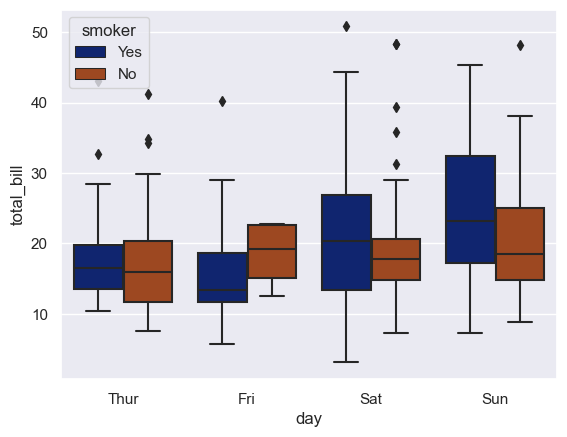

In [40]:
# Plotar um boxplot da base tips por dia em relacao ao valor total e inserindo a categoria 'fumante ou nao'

sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')


## Gráficos de Regressão
O Seaborn leva as visualizações de dados a outros níveis: Não apenas é possível plotar características, mas também é possível traçar a relação linear entre duas variáveis (modelo linear).

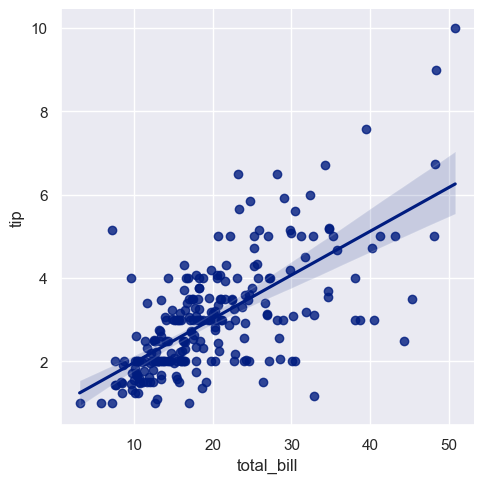

In [42]:
# Plotar gráfico Linear da base tips em relacao a valor total e gorjeta

sns.lmplot(data=tips, x='total_bill', y='tip')

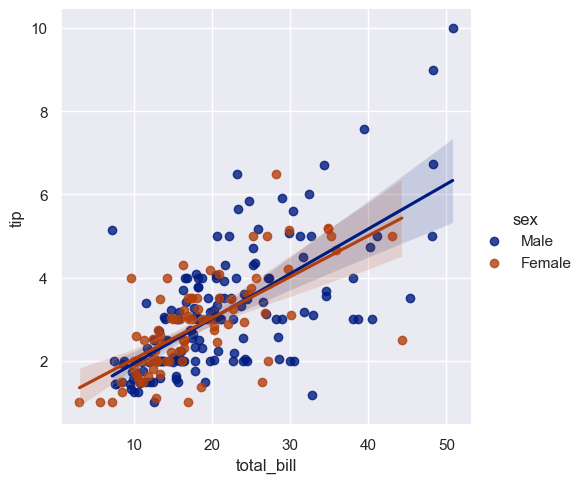

In [43]:
# Plotar gráfico Linear da base tips em relacao a valor total e gorjeta por sexo

sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

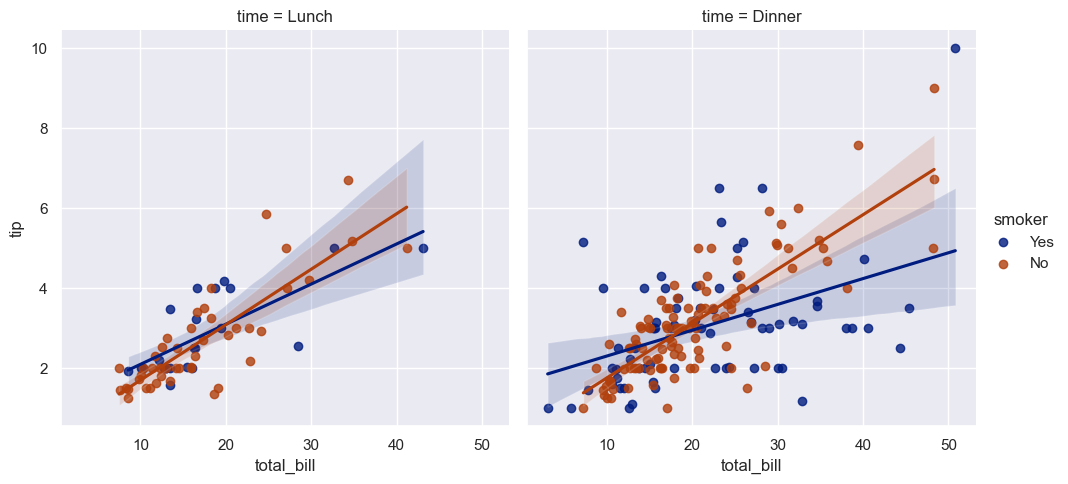

In [41]:
# Plotar gráfico Linear da base tips em relacao a valor total e gorjeta por fumante ou nao e horário

sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

## Gráficos de Matriz: Mapas de Calor e Mapas de Agrupamento

Na análise de dados, às vezes é útil visualizar os dados como matrizes codificadas por cores, o que pode ser utilizado para identificar agrupamentos dentro dos dados.

Mapas de Calor
<br>
A função heatmap() irá colorir a matriz.

In [9]:
# Encontrando a correlação entre as características no conjunto de dados das gorjetas

correlacao = tips.corr()
correlacao

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

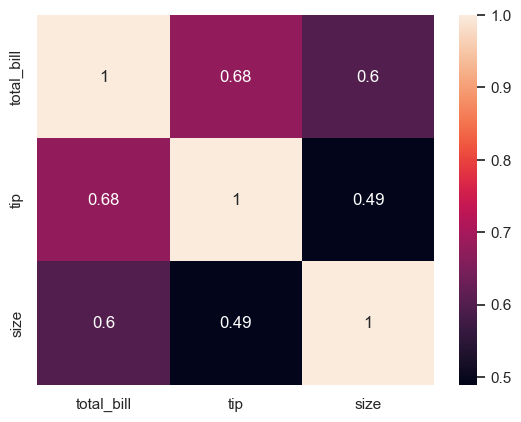

In [8]:
# Plotar gráfico de correlacao

sns.set_theme()
sns.heatmap(correlacao, annot=True)
#annot = True - Mostrar os valores

# Por hoje é isso, nos vemos na próxima  :)